In [ ]:
### http://localhost:8890/notebooks/da/da/jup_text_features2.ipynb#InitInstall Requirement
!pip install -r requirements.txt

# Init

In [106]:
%load_ext autoreload
%autoreload
%matplotlib inline
%config IPCompleter.greedy=True

import gc
import os
import logging
from datetime import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



warnings.filterwarnings('ignore')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [647]:
%load_ext autoreload
%autoreload
%matplotlib inline


import gc, os, sys, copy, string, logging
from datetime import datetime
import warnings
import numpy as np, pandas as pd, sklearn as sk

import seaborn as sns
import matplotlib.pyplot as plt

import lightgbm as lgb
from tqdm import tqdm_notebook

warnings.filterwarnings('ignore')




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
os.getcwd D:\_devs\Python01\gitdev\da\da


In [648]:
from sklearn import covariance, linear_model, model_selection, preprocessing
from sklearn.cluster import dbscan, k_means
from sklearn.decomposition import PCA, pca, TruncatedSVD, LatentDirichletAllocation, NMF

from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis)
from sklearn.ensemble import (AdaBoostClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier,
                              RandomForestClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, make_scorer,
                             mean_absolute_error, roc_auc_score, roc_curve)
from sklearn.model_selection import (GridSearchCV, KFold, StratifiedKFold,
                                     cross_val_score, train_test_split)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [649]:
### Local Import
import util_model
import util_feature
import util_plot
import util_text
import util_date

print(util_feature)





<module 'util_feature' from 'D:\\_devs\\Python01\\gitdev\\da\\da\\util_feature.py'>


# Data Loading, basic profiling

In [698]:
folder = os.getcwd() + "/data/airbnb/"
folder_model = folder + "/models/model01/"
folder_out = folder + "/out"



In [699]:
df = pd.read_csv(folder+'listings_summary.zip', delimiter=',')

df_list = pd.read_csv(folder+'listings.zip', delimiter=',')
df_rev_sum = pd.read_csv(  folder+'reviews_summary.zip', delimiter=',')






In [700]:
df.describe()


,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,453.000000,4.530000e+02,0.0,0.0,0.0,4.530000e+02,0.0,453.000000,453.000000,453.000000,...,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,433.000000,0.0,453.000000,437.000000
mean,230823.200883,2.018111e+13,NaN,NaN,NaN,1.063003e+06,NaN,2.293598,2.293598,52.510750,...,93.629032,9.569124,9.481567,9.665899,9.633641,9.513825,9.270208,NaN,2.105960,0.970984
std,114502.269723,0.000000e+00,NaN,NaN,NaN,6.034466e+05,NaN,2.496879,2.496879,0.034686,...,5.159192,0.680352,0.693674,0.649312,0.733162,0.641910,0.658607,NaN,2.396953,1.057860
min,2015.000000,2.018111e+13,NaN,NaN,NaN,2.217000e+03,NaN,1.000000,1.000000,52.378280,...,73.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,NaN,1.000000,0.010000
25%,169603.000000,2.018111e+13,NaN,NaN,NaN,6.118470e+05,NaN,1.000000,1.000000,52.494496,...,91.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,1.000000,0.230000
50%,244425.000000,2.018111e+13,NaN,NaN,NaN,1.152791e+06,NaN,1.000000,1.000000,52.511095,...,94.500000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,0.600000
75%,306312.000000,2.018111e+13,NaN,NaN,NaN,1.409188e+06,NaN,2.000000,2.000000,52.532849,...,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,1.370000
max,466983.000000,2.018111e+13,NaN,NaN,NaN,4.059665e+06,NaN,14.000000,14.000000,52.627088,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,14.000000,6.290000


In [56]:
 df.shape, df.columns, df.dtypes

((453, 95),
 Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
        'description', 'experiences_offered', 'neighborhood_overview', 'notes',
        'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
        'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
        'host_name', 'host_since', 'host_location', 'host_about',
        'host_response_time', 'host_response_rate', 'host_acceptance_rate',
        'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
        'host_neighbourhood', 'host_listings_count',
        'host_total_listings_count', 'host_verifications',
        'host_has_profile_pic', 'host_identity_verified', 'street',
        'neighbourhood', 'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
        'smart_location', 'country_code', 'country', 'latitude', 'longitude',
        'is_location_exact', 'property_type', 'room_type', 'accommodates',

In [8]:
### Pandas Profiling for features
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling as pp
profile =  df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file= folder + "pandas_report_output.html")


colexclude = profile.get_rejected_variables(threshold=0.98)
colexclude 



['host_total_listings_count']

In [8]:
colexclude = profile.get_rejected_variables(threshold=0.98)
colexclude 



['name_trigram_simple']

# Column selection by type

In [20]:
colid = "id"
colnum = [  "review_scores_communication", "review_scores_location", "review_scores_rating"
         ]


colcat = [ "cancellation_policy", "host_response_rate", "host_response_time" ]


coltext = ["house_rules", "neighborhood_overview", "notes", "street"  ]


coldate = [  "calendar_last_scraped", "first_review", "host_since" ]



coly = "price"


colall = colnum + colcat + coltext + coldate

"""

dfnum, dfcat, dfnum_bin, 
dfnum_binhot,  dfcat_hot

colnum, colcat, coltext, 
colnum_bin, colnum_binhot,  

"""

print(colall )


['review_scores_communication', 'review_scores_location', 'review_scores_rating', 'cancellation_policy', 'host_response_rate', 'host_response_time', 'house_rules', 'neighborhood_overview', 'notes', 'street', 'calendar_last_scraped', 'first_review', 'host_since']


In [12]:
df = df.set_index( colid )


,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42


In [21]:
df[colall].head(2)

,review_scores_communication,review_scores_location,review_scores_rating,cancellation_policy,host_response_rate,host_response_time,house_rules,neighborhood_overview,notes,street,calendar_last_scraped,first_review,host_since
id,,,,,,,,,,,,,
2015,10.0,10.0,93.0,strict_14_with_grace_period,96%,within an hour,"No parties No events No pets No smoking, not e...",It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Berlin, Berlin, Germany",2018-11-07,2016-04-11,2008-08-18
2695,10.0,10.0,100.0,flexible,NaN,NaN,NaN,NaN,NaN,"Berlin, Berlin, Germany",2018-11-07,2018-07-04,2008-09-16


# Data type normalization, Encoding process (numerics, category)

In [19]:
#Normalize to NA, NA Handling
# df = df.replace("?", np.nan)

colall


['review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'phone_equality',
 'fax_equality',
 'street_number_equality',
 'house_rules',
 'neighborhood_overview',
 'notes',
 'street',
 'calendar_last_scraped',
 'first_review',
 'host_since']

In [22]:
### colnum procesing 
for x in colnum :
    df[x] = df[x].astype("float32")

print( df[colall].dtypes )

review_scores_communication    float32
review_scores_location         float32
review_scores_rating           float32
cancellation_policy             object
host_response_rate              object
host_response_time              object
house_rules                     object
neighborhood_overview           object
notes                           object
street                          object
calendar_last_scraped           object
first_review                    object
host_since                      object
dtype: object


In [121]:
##### Colcat processing 
colcat_map = pd_colcat_mapping(df, colcat) 
                
#for col in colcat :
#    df[col] =  df[col].apply(lambda x : colcat_map["cat_map"][col].get(x)  )

print( df[colcat].dtypes , colcat_map)



phone_equality            int64
fax_equality              int64
street_number_equality    int64
dtype: object {'cat_map': {'phone_equality': {0: 0, 1: 1, 2: 2}, 'fax_equality': {0: 0, 1: 1, 2: 2}, 'street_number_equality': {0: 0, 1: 1, 2: 2}}, 'cat_map_inverse': {'phone_equality': {0: 0, 1: 1, 2: 2}, 'fax_equality': {0: 0, 1: 1, 2: 2}, 'street_number_equality': {0: 0, 1: 1, 2: 2}}}


In [35]:
#coly processing
def pd_str_clean( df, coly) :
    return    df[ coly].apply( lambda x : float( x.replace("$", "")) )

df[ coly ] = pd_str_clean(df, coly)


# Data Distribution after encoding/ data type normalization

In [36]:
#### ColTarget Distribution
coly_stat = util_feature.pd_stat_distribution( df[  [ colnum[0] , coly ]] ,  subsample_ratio= 1.0)
coly_stat




Univariate distribution


,col,n,n_na,n_notna,n_na_pct,nunique,nunique_pct,xmin,xmin_freq,xmin_pct,xmax,xmax_freq,xmax_pct,xmed,xmed_freq,xmed_pct
0,review_scores_communication,453.0,19.0,434,0.041943,7,0.015453,2.0,1,0.002208,10.0,306,0.675497,10.0,306,0.675497
1,price,453.0,0.0,453,0.000000,104,0.229581,9.0,5,0.011038,506.0,1,0.002208,60.0,20,0.044150


In [38]:
#### Col numerics distribution
colnum_stat = util_feature.pd_stat_distribution(df[colnum],  subsample_ratio= 0.6)
colnum_stat



Univariate distribution


,col,n,n_na,n_notna,n_na_pct,nunique,nunique_pct,xmin,xmin_freq,xmin_pct,xmax,xmax_freq,xmax_pct,xmed,xmed_freq,xmed_pct
0,review_scores_communication,272.0,10.0,262,0.036765,5,0.018382,2.0,1,0.003676,10.0,187,0.687500,10.0,187,0.687500
1,review_scores_location,272.0,10.0,262,0.036765,5,0.018382,6.0,2,0.007353,10.0,151,0.555147,10.0,151,0.555147
2,review_scores_rating,272.0,10.0,262,0.036765,22,0.080882,75.0,1,0.003676,100.0,28,0.102941,95.0,19,0.069853


In [33]:
#### Col stats distribution
colcat_stat = pd_stat_distribution(df[colcat], subsample_ratio= 0.3)
colcat_stat




Univariate distribution


,col,n,n_na,n_notna,n_na_pct,nunique,nunique_pct,xmin,xmin_freq,xmin_pct,xmax,xmax_freq,xmax_pct,xmed,xmed_freq,xmed_pct
0,phone_equality,8470.0,0.0,8470,0.0,3,0.000354,0,4946,0.583943,2,2322,0.274144,0.0,4946,0.583943
1,fax_equality,8470.0,0.0,8470,0.0,3,0.000354,0,8258,0.974970,2,109,0.012869,0.0,8258,0.974970
2,street_number_equality,8470.0,0.0,8470,0.0,3,0.000354,0,236,0.027863,2,4214,0.497521,1.0,4020,0.474616


# Feature processing (strategy 1)

In [16]:
### BAcKUP data before Pre-processing
dfref = copy.deepcopy( df )
print(dfref.shape)

(28235, 31)


In [27]:
"""
Many strategies are possible :
   1) Feature selection before the model
   2) Feature selection using model accuracy.
   
Unless of those cases :
   variable with correl > 99% (ie > imablance class %).
   variable with variance of 0 (as 0).
   Its better to keep all variables at 1st.
   Only Linear model (ie Regression, Logitsic) : 




"""




## Colnum

In [124]:
## Map numerics to Category bin
dfnum, colnum_binmap = pd_colnum_tocat(df, colname=colnum, colexclude=None, colbinmap=None,
                                  bins=5, suffix="_bin",    method="uniform",
                                  return_val="dataframe,param")


print(colnum_binmap)

name_levenshtein_simple
                            name_levenshtein_simple                           
                                                min   size      mean       max
name_levenshtein_simple_bin                                                   
0                                               0.0   3244  0.133234  0.199916
1                                               0.2   4352  0.284679  0.399802
2                                               0.4   4713  0.495519  0.599206
3                                               0.6   4992  0.679888  0.797778
4                                               0.8  10934  0.945298  1.000000
name_trigram_simple
                        name_trigram_simple                           
                                        min   size      mean       max
name_trigram_simple_bin                                               
0                                       0.0   6913  0.034203  0.199356
1                                       

In [125]:
colnum_bin =  [  x + "_bin" for x in  list( colnum_map.keys() )   ]
print( colnum_bin )




['name_levenshtein_simple_bin', 'name_trigram_simple_bin', 'name_levenshtein_term_bin', 'name_trigram_term_bin', 'city_levenshtein_simple_bin', 'city_trigram_simple_bin', 'city_levenshtein_term_bin', 'city_trigram_term_bin', 'zip_levenshtein_simple_bin', 'zip_trigram_simple_bin', 'zip_levenshtein_term_bin', 'zip_trigram_term_bin', 'street_levenshtein_simple_bin', 'street_trigram_simple_bin', 'street_levenshtein_term_bin', 'street_trigram_term_bin', 'website_levenshtein_simple_bin', 'website_trigram_simple_bin', 'website_levenshtein_term_bin', 'website_trigram_term_bin', 'phone_levenshtein_bin', 'phone_trigram_bin', 'fax_levenshtein_bin', 'fax_trigram_bin', 'street_number_levenshtein_bin', 'street_number_trigram_bin']


In [169]:
dfnum.columns



Index(['name_levenshtein_simple_bin', 'name_trigram_simple_bin',
       'name_levenshtein_term_bin', 'name_trigram_term_bin',
       'city_levenshtein_simple_bin', 'city_trigram_simple_bin',
       'city_levenshtein_term_bin', 'city_trigram_term_bin',
       'zip_levenshtein_simple_bin', 'zip_trigram_simple_bin',
       'zip_levenshtein_term_bin', 'zip_trigram_term_bin',
       'street_levenshtein_simple_bin', 'street_trigram_simple_bin',
       'street_levenshtein_term_bin', 'street_trigram_term_bin',
       'website_levenshtein_simple_bin', 'website_trigram_simple_bin',
       'website_levenshtein_term_bin', 'website_trigram_term_bin',
       'phone_levenshtein_bin', 'phone_trigram_bin', 'fax_levenshtein_bin',
       'fax_trigram_bin', 'street_number_levenshtein_bin',
       'street_number_trigram_bin'],
      dtype='object')

In [128]:
### numerics bin to One Hot
dfnum_hot, colnum_onehot = pd_col_to_onehot(dfnum[colnum_bin], colname=colnum_bin,
                             colonehot=None, return_val="dataframe,param")
dfnum_hot[ colnum_onehot   ] .head(10)



name_levenshtein_simple_bin 5 (28235, 26)
name_trigram_simple_bin 5 (28235, 30)
name_levenshtein_term_bin 5 (28235, 34)
name_trigram_term_bin 5 (28235, 38)
city_levenshtein_simple_bin 6 (28235, 42)
city_trigram_simple_bin 6 (28235, 47)
city_levenshtein_term_bin 6 (28235, 52)
city_trigram_term_bin 6 (28235, 57)
zip_levenshtein_simple_bin 6 (28235, 62)
zip_trigram_simple_bin 6 (28235, 67)
zip_levenshtein_term_bin 6 (28235, 72)
zip_trigram_term_bin 6 (28235, 77)
street_levenshtein_simple_bin 6 (28235, 82)
street_trigram_simple_bin 6 (28235, 87)
street_levenshtein_term_bin 6 (28235, 92)
street_trigram_term_bin 6 (28235, 97)
website_levenshtein_simple_bin 6 (28235, 102)
website_trigram_simple_bin 6 (28235, 107)
website_levenshtein_term_bin 6 (28235, 112)
website_trigram_term_bin 6 (28235, 117)
phone_levenshtein_bin 6 (28235, 122)
phone_trigram_bin 6 (28235, 127)
fax_levenshtein_bin 6 (28235, 132)
fax_trigram_bin 6 (28235, 137)
street_number_levenshtein_bin 6 (28235, 142)
street_number_trigr

,name_levenshtein_simple_bin_0,name_levenshtein_simple_bin_1,name_levenshtein_simple_bin_2,name_levenshtein_simple_bin_3,name_levenshtein_simple_bin_4,name_trigram_simple_bin_0,name_trigram_simple_bin_1,name_trigram_simple_bin_2,name_trigram_simple_bin_3,name_trigram_simple_bin_4,...,street_number_levenshtein_bin_0,street_number_levenshtein_bin_1,street_number_levenshtein_bin_2,street_number_levenshtein_bin_3,street_number_levenshtein_bin_4,street_number_trigram_bin_-1,street_number_trigram_bin_0,street_number_trigram_bin_1,street_number_trigram_bin_2,street_number_trigram_bin_4
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
6,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [202]:
0


0

In [277]:
## To pipeline
#  Save each feature processing into "Reproductible pipeline".
#  For Scalability, for repreoduction process
#  Functionnal appraoch --> Can be converted to Spark
#  For scalbility, and paralell

from util_feature import pd_col_to_num, pd_colnum_tocat, pd_col_to_onehot

pipe_preprocess_colnum =[ 
           (util_feature.pd_col_to_num,   {"default": np.nan,} , "Conver string to NA")
           
          ,(util_feature.pd_colnum_tocat, { "colname":None, "colbinmap": colnum_binmap,  'bins': 5, 
                               "method": "uniform", "suffix":"_bin", "return_val": "dataframe"}, 
                               "Convert Numerics to Category " )
           
          ,(util_feature.pd_col_to_onehot, { "colname": None,  "colonehot": colnum_onehot,  
                                "return_val": "dataframe"  } , 
                                "Convert category to onehot" )
]




In [278]:
###Check pipeline
util_feature.pd_pipeline_apply( df[colnum].iloc[:10000,:], pipe_preprocess_colnum)  





############## Pipeline  0 Start (10000, 26) pd_col_to_num
############## Pipeline   0 Finished (10000, 26)
############## Pipeline  1 Start (10000, 26) pd_colnum_tocat
name_levenshtein_simple
                            name_levenshtein_simple                          
                                                min  size      mean       max
name_levenshtein_simple_bin                                                  
0                                               0.0  1173  0.133397  0.199916
1                                               0.2  1542  0.284577  0.399802
2                                               0.4  1624  0.497450  0.598214
3                                               0.6  1800  0.679548  0.797778
4                                               0.8  3861  0.945058  1.000000
name_trigram_simple
                        name_trigram_simple                          
                                        min  size      mean       max
name_trigram_simple_bin

,name_levenshtein_simple_bin_0,name_levenshtein_simple_bin_1,name_levenshtein_simple_bin_2,name_levenshtein_simple_bin_3,name_levenshtein_simple_bin_4,name_trigram_simple_bin_0,name_trigram_simple_bin_1,name_trigram_simple_bin_2,name_trigram_simple_bin_3,name_trigram_simple_bin_4,...,street_number_levenshtein_bin_0,street_number_levenshtein_bin_1,street_number_levenshtein_bin_2,street_number_levenshtein_bin_3,street_number_levenshtein_bin_4,street_number_trigram_bin_-1,street_number_trigram_bin_0,street_number_trigram_bin_1,street_number_trigram_bin_2,street_number_trigram_bin_4
id,,,,,,,,,,,,,,,,,,,,,
1204#1207,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1272#1279,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
6258#6259,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
16076#16077,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2666#2671,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4402#4403,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4025#4028,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4126#4138,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4559#4560,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Colcat

In [236]:
dfcat_hot, colcat_onehot = util_feature.pd_col_to_onehot(df[colcat], colname=colcat,  
                                         colonehot=None, return_val="dataframe,param")
dfcat_hot[colcat_onehot ].head(5)




cancellation_policy 3 (453, 3)
host_response_rate 22 (453, 5)
host_response_time 5 (453, 25)


,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,host_response_rate_0%,host_response_rate_100%,host_response_rate_20%,host_response_rate_30%,host_response_rate_43%,host_response_rate_50%,host_response_rate_60%,...,host_response_rate_86%,host_response_rate_88%,host_response_rate_90%,host_response_rate_95%,host_response_rate_96%,host_response_rate_97%,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
id,,,,,,,,,,,,,,,,,,,,,
2015,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2695,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3176,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3309,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7071,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [135]:
print("Final features")

dfnum_hot.head(3) 
dfcat_hot.head(3) 



Final features


,phone_equality_0,phone_equality_1,phone_equality_2,fax_equality_0,fax_equality_1,fax_equality_2,street_number_equality_0,street_number_equality_1,street_number_equality_2
0,1,0,0,1,0,0,0,0,1
1,1,0,0,1,0,0,0,0,1
2,0,0,1,1,0,0,0,0,1


In [289]:
## To pipeline
#  Save each feature processing into "Reproductible pipeline".
#  For Scalability, for repreoduction process
#  Can be easily re-factored for PySpark )
pipe_preprocess_colcat =[ 
           (util_feature.pd_col_fillna, {"value": "-1", "method" : "",   "return_val": "dataframe" },
           )        

          ,(util_feature.pd_col_to_onehot, { "colname": None,  "colonehot": colcat_onehot,  
                                "return_val": "dataframe"  } , "convert to one hot")
]


###Check pipeline
util_feature.pd_pipeline_apply( df[colcat].iloc[:10,:], pipe_preprocess_colcat)  




############## Pipeline  0 Start (10, 3) pd_col_fillna
phone_equality 0 replaceBY -1
fax_equality 0 replaceBY -1
street_number_equality 0 replaceBY -1
############## Pipeline   0 Finished (10, 3)
############## Pipeline  1 Start (10, 3) pd_col_to_onehot
phone_equality 2 (10, 3)
fax_equality 1 (10, 3)
street_number_equality 2 (10, 3)
phone_equality_m added
phone_equality_n added
phone_equality_s added
fax_equality_m added
fax_equality_n added
fax_equality_s added
street_number_equality_m added
street_number_equality_n added
street_number_equality_s added
############## Pipeline   1 Finished (10, 9)


,phone_equality_m,phone_equality_n,phone_equality_s,fax_equality_m,fax_equality_n,fax_equality_s,street_number_equality_m,street_number_equality_n,street_number_equality_s
id,,,,,,,,,
1204#1207,0,0,0,0,0,0,0,0,0
1272#1279,0,0,0,0,0,0,0,0,0
6258#6259,0,0,0,0,0,0,0,0,0
16076#16077,0,0,0,0,0,0,0,0,0
2666#2671,0,0,0,0,0,0,0,0,0
4402#4403,0,0,0,0,0,0,0,0,0
4025#4028,0,0,0,0,0,0,0,0,0
4126#4138,0,0,0,0,0,0,0,0,0
4559#4560,0,0,0,0,0,0,0,0,0


In [240]:


os.getcwd()




'D:\\_devs\\Python01\\gitdev\\da\\da'

In [368]:
 string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Coltext  

In [248]:
### Remoe common words
import json
import string
punctuations = string.punctuation


stopwords = json.load(open("stopwords_en.json") )["word"]
stopwords = [ t for t in string.punctuation ] + stopwords
stopwords = [ "", " ", ",", ".", "-", "*", '€', "+", "/" ] + stopwords
stopwords =list(set( stopwords ))
stopwords.sort()
print( stopwords )


stopwords = set(stopwords)




['', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', 'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours'

In [148]:
#### NA to ""
df[coltext] =  df[coltext].fillna("")
print( df[coltext].isnull().sum() )



house_rules              0
neighborhood_overview    0
notes                    0
street                   0
dtype: int64


In [371]:

dftext = util_text.pd_coltext_clean( df[coltext], coltext, stopwords= stopwords ) 
        
dftext.head(6)




,house_rules,neighborhood_overview,notes,street
id,,,,
2015,parties events pets smoking even courtyard/gar...,located former east berlin area kastanienallee...,home hotel. rent occasionally stay friend.,berlin berlin germany
2695,,,,berlin berlin germany
3176,it’s non smoking flat likes treated love respe...,neighbourhood famous variety international eat...,welcome families cater especially young kids. ...,berlin berlin germany
3309,house rules information .............. deutsch...,flat middle west berlin directly mostly gay sa...,flat strictly non smoking facility two friendl...,berlin berlin germany
7071,please take good care everything stay attach g...,great neighborhood plenty cafés bakeries diner...,hope enjoy stay fullest please ask questions s...,berlin berlin germany
9991,,prenzlauer berg amazing neighbourhood bomème a...,,berlin berlin germany


In [391]:
### Word Token List
coltext_freq = {}
for col in coltext :
     coltext_freq[col] =  util_text.pd_coltext_wordfreq(dftext, col) 
    
coltext_freq






{'house_rules':                  word   freq
 124            please  257.0
 668               die  154.0
 667               und  143.0
 27          apartment  143.0
 12            smoking  125.0
 674               der  118.0
 16                     114.0
 247             check   97.0
 666             bitte   93.0
 676               ist   85.0
 762                zu   81.0
 40                use   75.0
 249                00   71.0
 75              house   64.0
 664           wohnung   63.0
 265                 5   62.0
 799               für   62.0
 687               sie   61.0
 663             nicht   61.0
 767               das   60.0
 149            guests   59.0
 156           allowed   55.0
 631               auf   55.0
 121             leave   54.0
 126        apartment.   52.0
 187                10   51.0
 184           illegal   51.0
 14            parties   47.0
 626                im   47.0
 185          internet   46.0
 ...               ...    ...
 2002           offend   

In [374]:
print(coltext_freq["house_rules"].values[:10])

[['please' 257.0]
 ['die' 154.0]
 ['und' 143.0]
 ['apartment' 143.0]
 ['smoking' 125.0]
 ['der' 118.0]
 ['' 114.0]
 ['check' 97.0]
 ['bitte' 93.0]
 ['ist' 85.0]]


In [396]:
ntoken=100
dftext_tdidf_dict, word_tokeep_dict = {}, {}
    
for col in coltext:
   word_tokeep = coltext_freq[col]["word"].values[:ntoken]
   word_tokeep = [  t for t in word_tokeep if t not in stopwords   ]
 
   dftext_tdidf_dict[col], word_tokeep_dict[col] = util_text.pd_coltext_tdidf( dftext, coltext= col,  word_minfreq= 1,
                                                        word_tokeep= word_tokeep ,
                                                        return_val= "dataframe,param"  )
  
    
dftext_tdidf_dict, word_tokeep_dict

({'house_rules':            0         1         2    3         4       5         6         7   \
  0    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
  1    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
  2    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.350753   
  3    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
  4    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.136759  0.501879   
  5    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
  6    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.416951   
  7    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
  8    0.184532  0.184532  0.000000  0.0  0.000000  0.0000  0.000000  0.338599   
  9    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
  10   0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.521776   
 

In [377]:
0

0

In [376]:
0


0

In [399]:
dftext_tdidf_dict[col], coltext

(           0         1         2    3         4       5         6         7   \
 0    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
 1    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
 2    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.350753   
 3    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
 4    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.136759  0.501879   
 5    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
 6    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.416951   
 7    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
 8    0.184532  0.184532  0.000000  0.0  0.000000  0.0000  0.000000  0.338599   
 9    0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000   
 10   0.000000  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.521776   
 11   0.500000  0.000000  0.

In [403]:
# util_model.




In [425]:
###  Dimesnion reduction for Sparse Matrix

dftext_svd_list, svd_list  = {},{}
for col in  coltext :
    dftext_svd_list[col], svd_list[col] = util_model.pd_dim_reduction(dftext_tdidf_dict[col], 
                                               colname=None,
                                               model_pretrain=None,                       
                                               colprefix= col + "_svd",
                                               method="svd", 
                                                           dimpca=2, 
                                                           return_val="dataframe,param")



dftext_svd_list, svd_list  
    


({'house_rules':      house_rules_svd_0  house_rules_svd_1
  0             0.282025          -0.036450
  1             0.000000           0.000000
  2             0.447739          -0.058232
  3             0.340081          -0.056896
  4             0.813935          -0.154392
  5             0.000000           0.000000
  6             0.405761          -0.062743
  7             0.000000           0.000000
  8             0.602546          -0.055792
  9             0.261512          -0.024922
  10            0.331316          -0.051766
  11            0.163924           0.100167
  12            0.602546          -0.055792
  13            0.125431           0.013644
  14            0.235256           0.051068
  15            0.572735          -0.106238
  16            0.000000           0.000000
  17            0.000000           0.000000
  18            0.751314          -0.120855
  19            0.405761          -0.062743
  20            0.271487          -0.026915
  21            0

In [426]:

0

0

In [429]:
## To pipeline
#  Save each feature processing into "Reproductible pipeline".
#  For Scalability, for repreoduction process

######### Pipeline ONE
col = 'house_rules'


pipe_preprocess_coltext01 =[ 
           ( util_text.pd_coltext_clean , {"colname": [col], "stopwords"  : stopwords },  )        

          ,( util_text.pd_coltext_tdidf, { "coltext": col,  "word_minfreq" : 1,
                                          "word_tokeep" :  word_tokeep_dict[col],
                                          "return_val": "dataframe"  } , "convert to TD-IDF vector")
    

          ,( util_model.pd_dim_reduction, { "colname": None, 
                                          "model_pretrain" : svd_list[col],
                                          "colprefix": col + "_svd",
                                          "method": "svd", "dimpca" :2, 
                                          "return_val": "dataframe"  } , "Dimension reduction")        
]

### Check pipeline
print( col, word_tokeep )
util_feature.pd_pipeline_apply( df[[col ]].iloc[:10,:], pipe_preprocess_coltext01).iloc[:10, :]  








house_rules {'please': 67, 'die': 25, 'und': 86, 'apartment': 7, 'smoking': 79, 'der': 23, 'check': 15, 'bitte': 14, 'ist': 45, 'zu': 94, 'use': 88, '00': 0, 'house': 39, 'wohnung': 93, 'für': 33, 'sie': 76, 'nicht': 57, 'das': 20, 'guests': 35, 'allowed': 6, 'auf': 9, 'leave': 50, '10': 1, 'illegal': 41, 'parties': 63, 'im': 42, 'internet': 44, 'shoes': 74, 'respect': 71, 'sich': 75, 'keine': 47, 'take': 81, 'von': 89, 'flat': 31, 'non': 60, 'pets': 65, 'make': 53, 'uhr': 85, 'stay': 80, 'rules': 73, 'dem': 21, 'sind': 77, 'tax': 82, 'es': 30, 'nach': 56, 'noise': 59, 'time': 83, '22': 3, 'home': 38, 'rauchen': 70, 'smoke': 78, 'quiet': 69, 'ask': 8, 'like': 51, 'clean': 17, 'room': 72, 'loud': 52, 'balcony': 10, 'airbnb': 5, 'one': 62, 'ab': 4, 'den': 22, 'kitchen': 49, 'berlin': 12, 'keep': 46, 'hidden': 37, 'cleaning': 18, 'music': 55, 'downloading': 27, 'nur': 61, 'wir': 91, 'door': 26, 'inside': 43, 'city': 16, 'mit': 54, 'eine': 29, 'bei': 11, 'ich': 40, '11': 2, 'ein': 28, 'pm'

,house_rules_svd_0,house_rules_svd_1
0,0.282025,-0.036450
1,0.000000,0.000000
2,0.453837,-0.059220
3,0.340081,-0.056896
4,0.811142,-0.153194
5,0.000000,0.000000
6,0.412526,-0.063694
7,0.000000,0.000000
8,0.606963,-0.056795
9,0.261512,-0.024922


In [430]:
######### Pipeline TWO
ntoken= 100
col =  'neighborhood_overview'


pipe_preprocess_coltext02 =[ 
           ( util_text.pd_coltext_clean , {"colname": [col], "stopwords"  : stopwords },  )        

          ,( util_text.pd_coltext_tdidf, { "coltext": col,  "word_minfreq" : 1,
                                          "word_tokeep" :  word_tokeep_dict[col],
                                          "return_val": "dataframe"  } , "convert to TD-IDF vector")
    

          ,( util_model.pd_dim_reduction, { "colname": None, 
                                          "model_pretrain" : svd_list[col],
                                          "colprefix": col + "_svd",
                                          "method": "svd", "dimpca" :2, 
                                          "return_val": "dataframe"  } , "Dimension reduction")        
]

### Check pipeline
print( col, word_tokeep )
util_feature.pd_pipeline_apply( df[[ col ]].iloc[:10, :], pipe_preprocess_coltext02).iloc[:10]  




neighborhood_overview {'please': 67, 'die': 25, 'und': 86, 'apartment': 7, 'smoking': 79, 'der': 23, 'check': 15, 'bitte': 14, 'ist': 45, 'zu': 94, 'use': 88, '00': 0, 'house': 39, 'wohnung': 93, 'für': 33, 'sie': 76, 'nicht': 57, 'das': 20, 'guests': 35, 'allowed': 6, 'auf': 9, 'leave': 50, '10': 1, 'illegal': 41, 'parties': 63, 'im': 42, 'internet': 44, 'shoes': 74, 'respect': 71, 'sich': 75, 'keine': 47, 'take': 81, 'von': 89, 'flat': 31, 'non': 60, 'pets': 65, 'make': 53, 'uhr': 85, 'stay': 80, 'rules': 73, 'dem': 21, 'sind': 77, 'tax': 82, 'es': 30, 'nach': 56, 'noise': 59, 'time': 83, '22': 3, 'home': 38, 'rauchen': 70, 'smoke': 78, 'quiet': 69, 'ask': 8, 'like': 51, 'clean': 17, 'room': 72, 'loud': 52, 'balcony': 10, 'airbnb': 5, 'one': 62, 'ab': 4, 'den': 22, 'kitchen': 49, 'berlin': 12, 'keep': 46, 'hidden': 37, 'cleaning': 18, 'music': 55, 'downloading': 27, 'nur': 61, 'wir': 91, 'door': 26, 'inside': 43, 'city': 16, 'mit': 54, 'eine': 29, 'bei': 11, 'ich': 40, '11': 2, 'ein'

,neighborhood_overview_svd_0,neighborhood_overview_svd_1
0,0.477414,-0.106235
1,0.000000,0.000000
2,0.362620,-0.078424
3,0.504297,-0.113565
4,0.523268,-0.132910
5,0.448545,-0.114981
6,0.000000,0.000000
7,0.000000,0.000000
8,0.121461,-0.043560
9,0.527222,-0.106903


In [338]:
dftext[coltext]

,house_rules,neighborhood_overview,notes,street
id,,,,
2015,parties events pets smoking even courtyard/gar...,located former east berlin area kastanienallee...,home hotel. rent occasionally stay friend.,berlin berlin germany
2695,,,,berlin berlin germany
3176,it’s non smoking flat likes treated love respe...,neighbourhood famous variety international eat...,welcome families cater especially young kids. ...,berlin berlin germany
3309,house rules information .............. deutsch...,flat middle west berlin directly mostly gay sa...,flat strictly non smoking facility two friendl...,berlin berlin germany
7071,please take good care everything stay attach g...,great neighborhood plenty cafés bakeries diner...,hope enjoy stay fullest please ask questions s...,berlin berlin germany
9991,,prenzlauer berg amazing neighbourhood bomème a...,,berlin berlin germany
14325,smoking loud music hosting parties apartment.,,,berlin berlin germany
16401,,,,berlin berlin germany
16644,1. noise 10 pm please. 2. please wear outdoor ...,part kreuzberg best. good vibes good stores in...,,berlin berlin germany


## Coldate

In [465]:
coldate = [  "first_review", "host_since" ]


In [516]:
df[coldate].head(4)



# df[col]  = df[ "first_review" ]

,first_review,host_since
id,,
2015,2016-04-11,2016-04-11
2695,2018-07-04,2018-07-04
3176,2009-06-20,2009-06-20
3309,2013-08-12,2013-08-12


In [534]:
import dateutil
import copy
from datetime import datetime

pd_datestring_split( df , col, fmt="auto" ).head(5)




,host_since,host_since_dt,host_since_year,host_since_month,host_since_day
id,,,,,
2015,2016-04-11,2016-04-11,2016.0,4.0,11.0
2695,2018-07-04,2018-07-04,2018.0,7.0,4.0
3176,2009-06-20,2009-06-20,2009.0,6.0,20.0
3309,2013-08-12,2013-08-12,2013.0,8.0,12.0
7071,2009-08-18,2009-08-18,2009.0,8.0,18.0


In [519]:
df[coldate].iloc[ :10 , :]

,first_review,host_since
id,,
2015,2016-04-11,2016-04-11
2695,2018-07-04,2018-07-04
3176,2009-06-20,2009-06-20
3309,2013-08-12,2013-08-12
7071,2009-08-18,2009-08-18
9991,2015-08-09,2015-08-09
14325,2010-06-29,2010-06-29
16401,first_review,first_review
16644,2010-06-04,2010-06-04


In [533]:
dfdate_list, coldate_list  = {},{}
for col in  coldate :
    dfdate_list[col] = pd_datestring_split( df , col, fmt="auto", "return_val": "split" )
    coldate_list[col] =  [   t for t in  dfdate_list[col].columns if t not in  [col, col +"_dt"]      ]
    


    dfdate_list, coldate_list

({'first_review':         first_review first_review_dt  first_review_year  first_review_month  \
  id                                                                            
  2015      2016-04-11      2016-04-11             2016.0                 4.0   
  2695      2018-07-04      2018-07-04             2018.0                 7.0   
  3176      2009-06-20      2009-06-20             2009.0                 6.0   
  3309      2013-08-12      2013-08-12             2013.0                 8.0   
  7071      2009-08-18      2009-08-18             2009.0                 8.0   
  9991      2015-08-09      2015-08-09             2015.0                 8.0   
  14325     2010-06-29      2010-06-29             2010.0                 6.0   
  16401   first_review             NaT                NaN                 NaN   
  16644     2010-06-04      2010-06-04             2010.0                 6.0   
  17409     2010-10-07      2010-10-07             2010.0                10.0   
  17904     

In [ ]:
######### Pipeline ##########################################
ntoken= 100
col =  'neighborhood_overview'


pipe_preprocess_coltext02 =[ 
           ( util_text.pd_coldate_split , {"colname": col, "fmt": "auto", "return_val": "split"  },  )        
     
]

### Check pipeline
print( col, word_tokeep )
util_feature.pd_pipeline_apply( df[[ col ]].iloc[:10, :], pipe_preprocess_coltext02).iloc[:10]  





In [552]:

dfdate_hash, coldate_hash_model= util_text.pd_coltext_minhash(df, coldate, n_component=[4, 2], 
                                                    model_pretrain_dict=None,       
                                                    return_val="dataframe,param") 


dfdate_hash, coldate_hash_model

(     first_review_hash_0  first_review_hash_1  first_review_hash_2  \
 0               0.015973             0.054575             0.053763   
 1               0.072877             0.108171             0.026549   
 2               0.092159             0.020624             0.014038   
 3               0.005336             0.012219             0.006054   
 4               0.085544             0.012219             0.014038   
 5               0.094014             0.012219             0.067332   
 6               0.008748             0.006139             0.009404   
 7               0.042395             0.006543             0.031713   
 8               0.020662             0.006139             0.009404   
 9               0.020662             0.006139             0.009404   
 10              0.020662             0.006139             0.009404   
 11              0.073343             0.035027             0.009404   
 12              0.020662             0.006139             0.009404   
 13   

In [665]:
######### Pipeline ##########################################
pipe_preprocess_coldate_01 =[ 
    (util_text.pd_coltext_fillna , {"colname": coldate, "val" : ""  },  )   ,
    
    (util_text.pd_coltext_minhash , {"colname": coldate, "n_component" : [],
                                          "model_pretrain_dict" : coldate_hash_model,
                                           "return_val": "dataframe"  },  )        
     
]

    
    
### Check pipeline
print( coldate )
util_feature.pd_pipeline_apply( df[ coldate ].iloc[:10, :], pipe_preprocess_coldate_01).iloc[:10]  



['first_review', 'host_since']
############## Pipeline  0 Start (10, 2) pd_coltext_fillna
############## Pipeline   0 Finished (10, 2)
############## Pipeline  1 Start (10, 2) pd_coltext_minhash
############## Pipeline   1 Finished (10, 6)


,first_review_hash_0,first_review_hash_1,first_review_hash_2,first_review_hash_3,host_since_hash_0,host_since_hash_1
0,0.015973,0.054575,0.053763,0.000065,0.015973,0.054575
1,0.072877,0.108171,0.026549,0.021042,0.072877,0.108171
2,0.092159,0.020624,0.014038,0.039355,0.092159,0.020624
3,0.005336,0.012219,0.006054,0.026590,0.005336,0.012219
4,0.085544,0.012219,0.014038,0.048306,0.085544,0.012219
5,0.094014,0.012219,0.067332,0.021558,0.094014,0.012219
6,0.008748,0.006139,0.009404,0.055076,0.008748,0.006139
7,0.042395,0.006543,0.031713,0.021530,0.042395,0.006543
8,0.020662,0.006139,0.009404,0.021039,0.020662,0.006139
9,0.020662,0.006139,0.009404,0.055076,0.020662,0.006139


dtype('O')

AttributeError: module 'util_text' has no attribute 'pd_colcat_minhash'

# Pre-Feature Selection

# Train data preparation

In [ ]:
df[coly] = df[coly].apply( lambda x : 1 if x >90 else -1)

In [603]:
#### Train data preparation
#dfX = pd.concat(( dfnum_hot, dfcat_hot ), axis=1)

dfX = pd.concat(( # dfnum_hot, 
                  #dfcat_hot, 
                  dfdate_hash,
                  dftext_svd_list['house_rules'],             
                ) , axis=1)

colX = list( dfX.columns )

dfy = df[coly]
#X  = dfX.values
#yy = df[coly].values

Xtrain, Xtest, ytrain, ytest = train_test_split( dfX,  dfy,   
                                                 random_state=42,
                                                 test_size=0.5, shuffle=True)


print( Xtrain.shape, Xtest.shape, ytrain.shape ) 
print( colX )



(226, 8) (227, 8) (226,)
['first_review_hash_0', 'first_review_hash_1', 'first_review_hash_2', 'first_review_hash_3', 'host_since_hash_0', 'host_since_hash_1', 'house_rules_svd_0', 'house_rules_svd_1']


In [557]:
dftext_svd_list

{'house_rules':      house_rules_svd_0  house_rules_svd_1
 0             0.282025          -0.036450
 1             0.000000           0.000000
 2             0.447739          -0.058232
 3             0.340081          -0.056896
 4             0.813935          -0.154392
 5             0.000000           0.000000
 6             0.405761          -0.062743
 7             0.000000           0.000000
 8             0.602546          -0.055792
 9             0.261512          -0.024922
 10            0.331316          -0.051766
 11            0.163924           0.100167
 12            0.602546          -0.055792
 13            0.125431           0.013644
 14            0.235256           0.051068
 15            0.572735          -0.106238
 16            0.000000           0.000000
 17            0.000000           0.000000
 18            0.751314          -0.120855
 19            0.405761          -0.062743
 20            0.271487          -0.026915
 21            0.493485          -0.102

# Model evaluation

## Baseline : Logistic L2 penalty 

In [670]:

clf_log = sk.linear_model.LogisticRegression(penalty = 'l2' , class_weight = 'balanced')




############# Train dataset  ####################################
Test confusion matrix
[[ 64 125]
 [ 12  25]]
[[0.33862434 0.66137566]
 [0.32432432 0.67567568]]
auc 0.5703560703560704
gini 0.14071214071214078
acc 0.3938053097345133
f1macro 0.3751992735344567
Nsample 226
              precision    recall  f1-score   support

           0       0.84      0.34      0.48       189
           1       0.17      0.68      0.27        37

   micro avg       0.39      0.39      0.39       226
   macro avg       0.50      0.51      0.38       226
weighted avg       0.73      0.39      0.45       226



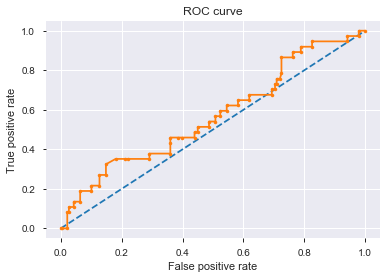

############# Test dataset  #########################################
Test confusion matrix
[[ 55 134]
 [ 10  28]]
[[0.29100529 0.70899471]
 [0.26315789 0.73684211]]
auc 0.4839877471456419
gini -0.03202450570871618
acc 0.3656387665198238
f1macro 0.3565354330708661
Nsample 227
              precision    recall  f1-score   support

           0       0.85      0.29      0.43       189
           1       0.17      0.74      0.28        38

   micro avg       0.37      0.37      0.37       227
   macro avg       0.51      0.51      0.36       227
weighted avg       0.73      0.37      0.41       227



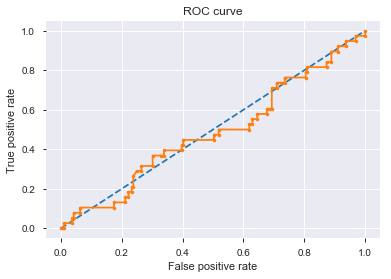

In [671]:
clf_log, clf_log_stats = util_model.sk_model_eval_classification(clf_log, 1,
                                           Xtrain, ytrain, Xtest, ytest)



In [ ]:
clf_log, dd = sk_model_eval_classification(clf_log, 1,
                                           Xtrain, ytrain, Xtest, ytest)



############# CV-0######################################
############# Train dataset  ####################################
Test confusion matrix
[[114  73]
 [ 20  19]]
[[0.60962567 0.39037433]
 [0.51282051 0.48717949]]
auc 0.5911147675853556
gini 0.18222953517071128
acc 0.588495575221239
f1macro 0.5001783548548191
Nsample 226
              precision    recall  f1-score   support

           0       0.85      0.61      0.71       187
           1       0.21      0.49      0.29        39

   micro avg       0.59      0.59      0.59       226
   macro avg       0.53      0.55      0.50       226
weighted avg       0.74      0.59      0.64       226



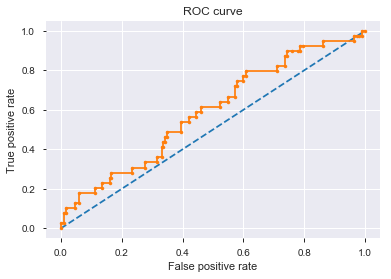

############# Test dataset  #########################################
Test confusion matrix
[[124  67]
 [ 22  14]]
[[0.64921466 0.35078534]
 [0.61111111 0.38888889]]
auc 0.5404304828388599
gini 0.08086096567771972
acc 0.6079295154185022
f1macro 0.4876106419133126
Nsample 227
              precision    recall  f1-score   support

           0       0.85      0.65      0.74       191
           1       0.17      0.39      0.24        36

   micro avg       0.61      0.61      0.61       227
   macro avg       0.51      0.52      0.49       227
weighted avg       0.74      0.61      0.66       227



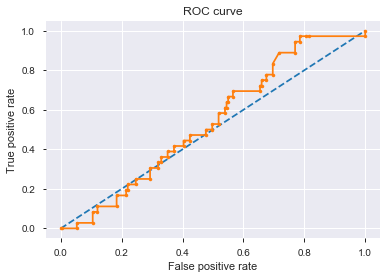

############# CV-1######################################
############# Train dataset  ####################################
Test confusion matrix
[[95 93]
 [17 21]]
[[0.50531915 0.49468085]
 [0.44736842 0.55263158]]
auc 0.5880459126539753
gini 0.17609182530795064
acc 0.5132743362831859
f1macro 0.4548245614035088
Nsample 226
              precision    recall  f1-score   support

           0       0.85      0.51      0.63       188
           1       0.18      0.55      0.28        38

   micro avg       0.51      0.51      0.51       226
   macro avg       0.52      0.53      0.45       226
weighted avg       0.74      0.51      0.57       226



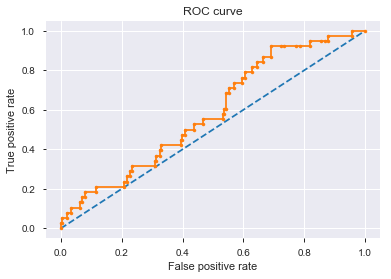

############# Test dataset  #########################################
Test confusion matrix
[[91 99]
 [20 17]]
[[0.47894737 0.52105263]
 [0.54054054 0.45945946]]
auc 0.46998577524893315
gini -0.06002844950213371
acc 0.47577092511013214
f1macro 0.4134366925064599
Nsample 227
              precision    recall  f1-score   support

           0       0.82      0.48      0.60       190
           1       0.15      0.46      0.22        37

   micro avg       0.48      0.48      0.48       227
   macro avg       0.48      0.47      0.41       227
weighted avg       0.71      0.48      0.54       227



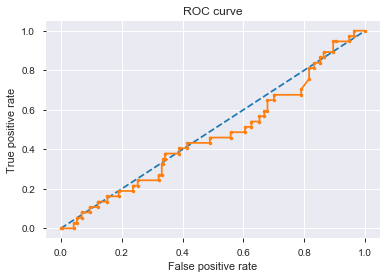

############# CV-2######################################
############# Train dataset  ####################################
Test confusion matrix
[[109  82]
 [ 12  23]]
[[0.57068063 0.42931937]
 [0.34285714 0.65714286]]
auc 0.6486910994764398
gini 0.29738219895287954
acc 0.584070796460177
f1macro 0.5136446886446886
Nsample 226
              precision    recall  f1-score   support

           0       0.90      0.57      0.70       191
           1       0.22      0.66      0.33        35

   micro avg       0.58      0.58      0.58       226
   macro avg       0.56      0.61      0.51       226
weighted avg       0.80      0.58      0.64       226



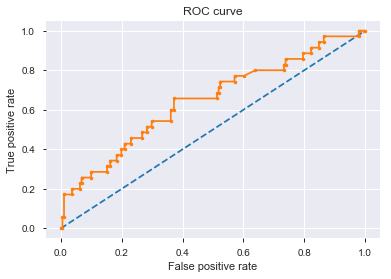

############# Test dataset  #########################################
Test confusion matrix
[[111  76]
 [ 23  17]]
[[0.59358289 0.40641711]
 [0.575      0.425     ]]
auc 0.5197860962566845
gini 0.039572192513368964
acc 0.5638766519823789
f1macro 0.47361394139554497
Nsample 227
              precision    recall  f1-score   support

           0       0.83      0.59      0.69       187
           1       0.18      0.42      0.26        40

   micro avg       0.56      0.56      0.56       227
   macro avg       0.51      0.51      0.47       227
weighted avg       0.71      0.56      0.61       227



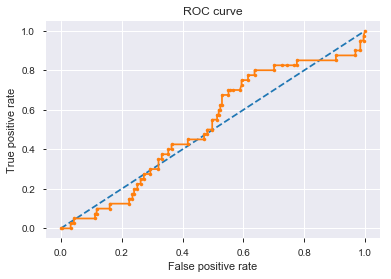

{0: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
           solver='warn', tol=0.0001, verbose=0, warm_start=False),
 1: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
           solver='warn', tol=0.0001, verbose=0, warm_start=False),
 2: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
           solver='warn', tol=0.0001, verbose=0, warm_start=False)}

In [576]:
util_model.sk_model_eval_classification_cv(clf_log,  dfX, dfy, test_size=0.5, ncv=3 )



In [582]:
clf_log_feat = util_model.sk_feature_impt(clf_log, colX, model_type="logistic" )
clf_log_feat.head(20) 



,feature,weight,weight_abs,rank
1,first_review_hash_1,-1.037341,1.037341,0
5,host_since_hash_1,-1.037341,1.037341,1
0,first_review_hash_0,0.512416,0.512416,2
4,host_since_hash_0,0.512416,0.512416,3
6,house_rules_svd_0,0.449688,0.449688,4
7,house_rules_svd_1,0.252144,0.252144,5
3,first_review_hash_3,0.076051,0.076051,6
2,first_review_hash_2,-0.035910,0.035910,7


In [583]:
clf_log_stats 

{'ytest_pred': array([ 1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,
        -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1,
        -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
         1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
         1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,
         1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
         1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,
         1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1


## Light GBM

In [584]:

clf_lgb = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l2', 
                         max_depth= 15, n_estimators = 50, objective= 'binary',
                         num_leaves = 38, njobs= -1 )



############# Train dataset  ####################################
Test confusion matrix
[[189   0]
 [  9  28]]
[[1.         0.        ]
 [0.24324324 0.75675676]]
auc 0.9914914914914915
gini 0.982982982982983
acc 0.9601769911504425
f1macro 0.9191413237924866
Nsample 226
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       189
           1       1.00      0.76      0.86        37

   micro avg       0.96      0.96      0.96       226
   macro avg       0.98      0.88      0.92       226
weighted avg       0.96      0.96      0.96       226



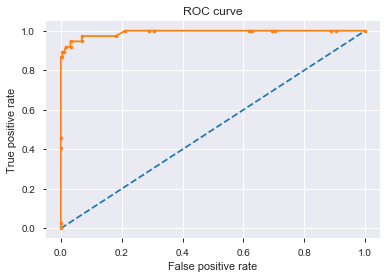

############# Test dataset  #########################################
Test confusion matrix
[[176  13]
 [ 33   5]]
[[0.93121693 0.06878307]
 [0.86842105 0.13157895]]
auc 0.6047062099693679
gini 0.20941241993873572
acc 0.7973568281938326
f1macro 0.5314967695620962
Nsample 227
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       189
           1       0.28      0.13      0.18        38

   micro avg       0.80      0.80      0.80       227
   macro avg       0.56      0.53      0.53       227
weighted avg       0.75      0.80      0.77       227



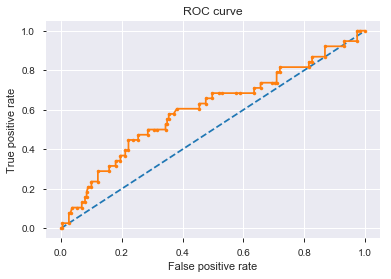

In [604]:
clf_lgb, clf_lgb_stats  = util_model.sk_model_eval_classification(clf_lgb, 1,
                                           Xtrain, ytrain, Xtest, ytest)


In [586]:
import shap
shap.initjs()

#dftest = pd.DataFrame( columns=colX, data=Xtest)

explainer = shap.TreeExplainer( clf_lgb )
shap_values = explainer.shap_values(  Xtest )


# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], Xtest.iloc[0,:] )





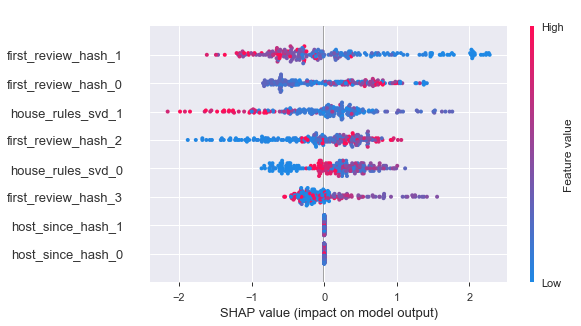

In [587]:
# Plot summary_plot as barplot:
shap.summary_plot(shap_values, Xtest)



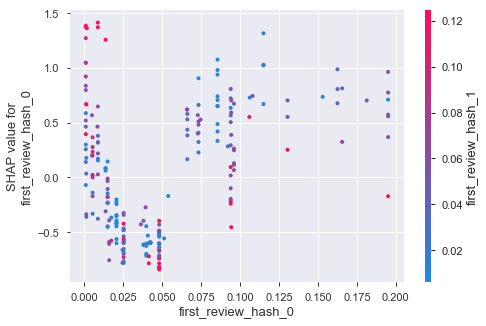

In [589]:
# visualize the training set predictions
shap.dependence_plot(  colX[0]  , shap_values, Xtest.iloc[:,:]  )





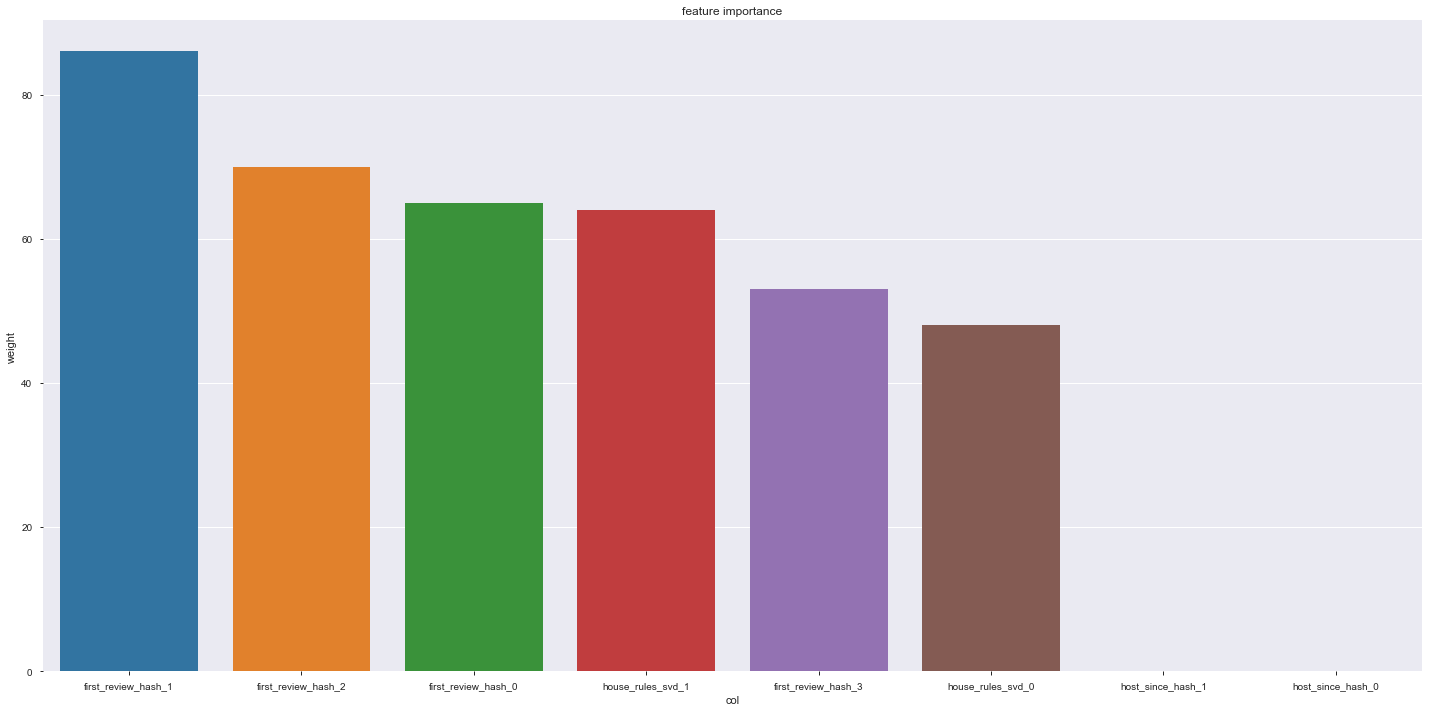

<Figure size 432x288 with 0 Axes>

In [593]:
lgb_feature_imp = util_model.sk_feature_impt(clf_lgb.feature_importances_, colname= colX, model_type="lgb")


util_plot.plotbar(lgb_feature_imp.iloc[:10,:], colname=["col", "weight"],  
                  title="feature importance", savefile="lgb_feature_imp.png") 





In [597]:
kf = StratifiedKFold(n_splits=3, shuffle=True)
# partially based on https://www.kaggle.com/c0conuts/xgb-k-folds-fastai-pca
clf_list = []
for itrain, itest in kf.split(dfX, dfy):
    print("###")
    Xtrain, Xval = dfX.loc[ itrain, : ], dfX.loc[ itest, : ]
    ytrain, yval = dfy.loc[ itrain ], dfy.loc[ itest ]
    clf_lgb.fit(Xtrain, ytrain, eval_set=[(Xval, yval)], 
            early_stopping_rounds=20)
    
    
    clf_list.append( clf_lgb)
    
    




###


KeyError: "None of [Int64Index([  0,   5,   6,   7,   8,   9,  11,  13,  16,  17,\n            ...\n            440, 441, 442, 443, 445, 446, 448, 449, 450, 451],\n           dtype='int64', name='id', length=302)] are in the [index]"

In [599]:
for i, clfi in enumerate( clf_list) :
    print(i)
    clf_lgbi, dd_lgbi = util_model.sk_model_eval_classification(clfi, 0,
                                               Xtrain, ytrain, Xtest, ytest)

    
clf_lgbi, dd_lgbi


NameError: name 'clf_lgbi' is not defined

## SVM

############# Train dataset  ####################################
Test confusion matrix
[[189   0]
 [ 37   0]]
[[1. 0.]
 [1. 0.]]
auc 0.6068211068211068
gini 0.21364221364221359
acc 0.8362831858407079
f1macro 0.4554216867469879
Nsample 226
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       189
           1       0.00      0.00      0.00        37

   micro avg       0.84      0.84      0.84       226
   macro avg       0.42      0.50      0.46       226
weighted avg       0.70      0.84      0.76       226



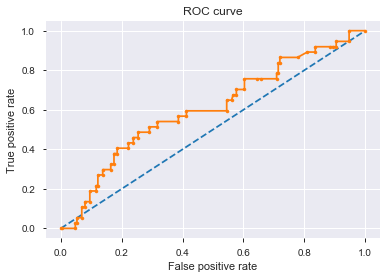

############# Test dataset  #########################################
Test confusion matrix
[[189   0]
 [ 38   0]]
[[1. 0.]
 [1. 0.]]
auc 0.5616819827346143
gini 0.12336396546922868
acc 0.8325991189427313
f1macro 0.4543269230769231
Nsample 227
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       189
           1       0.00      0.00      0.00        38

   micro avg       0.83      0.83      0.83       227
   macro avg       0.42      0.50      0.45       227
weighted avg       0.69      0.83      0.76       227



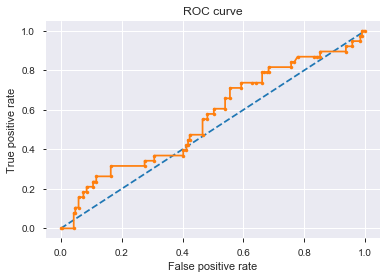

In [605]:

clf_svc = SVC(C=1.0, probability=True) # since we need probabilities

clf_svc, clf_svc_stats = util_model.sk_model_eval_classification(clf_svc, 1,
                                               Xtrain, ytrain, Xtest, ytest)



## Neural Network MLP Classifier

In [606]:

from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier( hidden_layer_sizes=(50,), max_iter=80, alpha=1e-4,
                        activation="relu",
                        solver='adam', verbose=10, tol=1e-4, random_state=1,
                        learning_rate_init= 0.1, early_stopping=True, validation_fraction=0.2 )
                       
                     

############# Train dataset  ####################################
Iteration 1, loss = 0.71479342
Validation score: 0.782609
Iteration 2, loss = 0.45554158
Validation score: 0.782609
Iteration 3, loss = 0.43490528
Validation score: 0.782609
Iteration 4, loss = 0.46973003
Validation score: 0.782609
Iteration 5, loss = 0.46240122
Validation score: 0.782609
Iteration 6, loss = 0.43860140
Validation score: 0.782609
Iteration 7, loss = 0.42257777
Validation score: 0.782609
Iteration 8, loss = 0.42021300
Validation score: 0.782609
Iteration 9, loss = 0.42445255
Validation score: 0.782609
Iteration 10, loss = 0.42867102
Validation score: 0.782609
Iteration 11, loss = 0.42972653
Validation score: 0.782609
Iteration 12, loss = 0.42749792
Validation score: 0.782609
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Test confusion matrix
[[189   0]
 [ 37   0]]
[[1. 0.]
 [1. 0.]]
auc 0.5696410696410696
gini 0.13928213928213928
acc 0.8362831858407079
f1macro

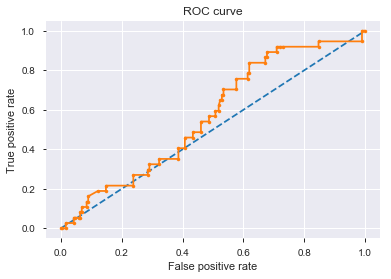

############# Test dataset  #########################################
Test confusion matrix
[[189   0]
 [ 38   0]]
[[1. 0.]
 [1. 0.]]
auc 0.46755778334725706
gini -0.06488443330548588
acc 0.8325991189427313
f1macro 0.4543269230769231
Nsample 227
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       189
           1       0.00      0.00      0.00        38

   micro avg       0.83      0.83      0.83       227
   macro avg       0.42      0.50      0.45       227
weighted avg       0.69      0.83      0.76       227



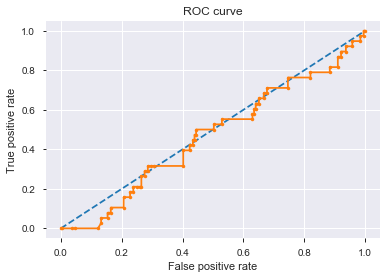

In [608]:
clf_nn, dd_nn = util_model.sk_model_eval_classification(clf_nn, 1,
                                           Xtrain, ytrain, Xtest, ytest)



# Feature selection


In [ ]:
### Feature Selection (reduce over-fitting)
   #Pre model feature selection (sometimes some features are useful even with low variance....)
   #Post model feature selection




In [613]:
### Model independant Selection
colX_kbest= util_model.sk_feature_selection(clf_nn,  method="f_classif", colname= colX, kbest="all",
                                 Xtrain= Xtrain, ytrain= ytrain)


print( colX_kbest )

['first_review_hash_0', 'first_review_hash_1', 'first_review_hash_2', 'first_review_hash_3', 'host_since_hash_0', 'host_since_hash_1', 'house_rules_svd_0', 'house_rules_svd_1']


In [618]:
colX_best = [ 'first_review_hash_0', 'first_review_hash_1', 
              'first_review_hash_2', 'first_review_hash_3', 
              'host_since_hash_0', 'host_since_hash_1', 'house_rules_svd_0']




In [614]:
clf_log_feat[ :15 ] 


,feature,weight,weight_abs,rank
1,first_review_hash_1,-1.037341,1.037341,0
5,host_since_hash_1,-1.037341,1.037341,1
0,first_review_hash_0,0.512416,0.512416,2
4,host_since_hash_0,0.512416,0.512416,3
6,house_rules_svd_0,0.449688,0.449688,4
7,house_rules_svd_1,0.252144,0.252144,5
3,first_review_hash_3,0.076051,0.076051,6
2,first_review_hash_2,-0.035910,0.035910,7


In [80]:
clf_log.fit( dfX[colX].values , df[coly].values) 

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

(226, 7) (226,)
##########  ['first_review_hash_0']
Test confusion matrix
[[128  61]
 [ 23  15]]
[[0.67724868 0.32275132]
 [0.60526316 0.39473684]]
auc 0.5822890559732665
gini 0.16457811194653305
acc 0.6299559471365639
f1macro 0.5080495356037151
Nsample 227
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       189
           1       0.20      0.39      0.26        38

   micro avg       0.63      0.63      0.63       227
   macro avg       0.52      0.54      0.51       227
weighted avg       0.74      0.63      0.67       227



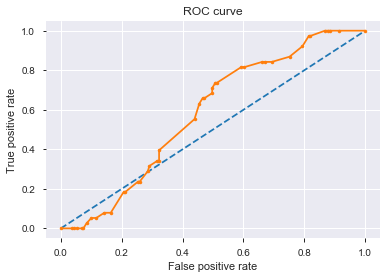

##########  ['first_review_hash_0', 'first_review_hash_1']
Test confusion matrix
[[91 98]
 [17 21]]
[[0.48148148 0.51851852]
 [0.44736842 0.55263158]]
auc 0.5714981899192425
gini 0.142996379838485
acc 0.4933920704845815
f1macro 0.4401552681807459
Nsample 227
              precision    recall  f1-score   support

           0       0.84      0.48      0.61       189
           1       0.18      0.55      0.27        38

   micro avg       0.49      0.49      0.49       227
   macro avg       0.51      0.52      0.44       227
weighted avg       0.73      0.49      0.55       227



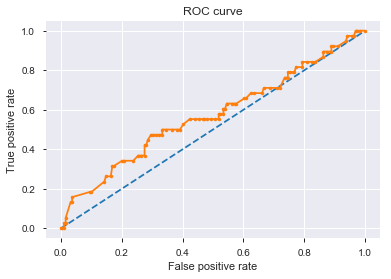

##########  ['first_review_hash_0', 'first_review_hash_1', 'first_review_hash_2']
Test confusion matrix
[[ 82 107]
 [ 14  24]]
[[0.43386243 0.56613757]
 [0.36842105 0.63157895]]
auc 0.5300055694792538
gini 0.060011138958507626
acc 0.4669603524229075
f1macro 0.42973113256514067
Nsample 227
              precision    recall  f1-score   support

           0       0.85      0.43      0.58       189
           1       0.18      0.63      0.28        38

   micro avg       0.47      0.47      0.47       227
   macro avg       0.52      0.53      0.43       227
weighted avg       0.74      0.47      0.53       227



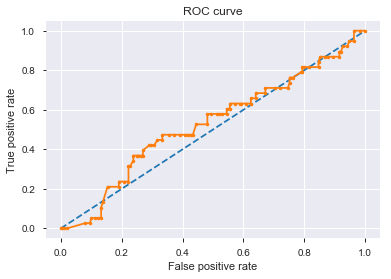

##########  ['first_review_hash_0', 'first_review_hash_1', 'first_review_hash_2', 'first_review_hash_3']
Test confusion matrix
[[ 82 107]
 [ 14  24]]
[[0.43386243 0.56613757]
 [0.36842105 0.63157895]]
auc 0.5316764132553606
gini 0.06335282651072127
acc 0.4669603524229075
f1macro 0.42973113256514067
Nsample 227
              precision    recall  f1-score   support

           0       0.85      0.43      0.58       189
           1       0.18      0.63      0.28        38

   micro avg       0.47      0.47      0.47       227
   macro avg       0.52      0.53      0.43       227
weighted avg       0.74      0.47      0.53       227



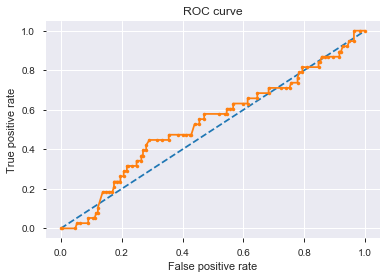

##########  ['first_review_hash_0', 'first_review_hash_1', 'first_review_hash_2', 'first_review_hash_3', 'host_since_hash_0']
Test confusion matrix
[[ 79 110]
 [ 15  23]]
[[0.41798942 0.58201058]
 [0.39473684 0.60526316]]
auc 0.5352965747702589
gini 0.07059314954051787
acc 0.44933920704845814
f1macro 0.41365486743950575
Nsample 227
              precision    recall  f1-score   support

           0       0.84      0.42      0.56       189
           1       0.17      0.61      0.27        38

   micro avg       0.45      0.45      0.45       227
   macro avg       0.51      0.51      0.41       227
weighted avg       0.73      0.45      0.51       227



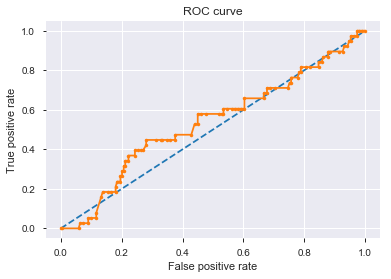

##########  ['first_review_hash_0', 'first_review_hash_1', 'first_review_hash_2', 'first_review_hash_3', 'host_since_hash_0', 'host_since_hash_1']
Test confusion matrix
[[ 88 101]
 [ 15  23]]
[[0.46560847 0.53439153]
 [0.39473684 0.60526316]]
auc 0.5423976608187135
gini 0.08479532163742709
acc 0.4889867841409692
f1macro 0.4433451716556739
Nsample 227
              precision    recall  f1-score   support

           0       0.85      0.47      0.60       189
           1       0.19      0.61      0.28        38

   micro avg       0.49      0.49      0.49       227
   macro avg       0.52      0.54      0.44       227
weighted avg       0.74      0.49      0.55       227



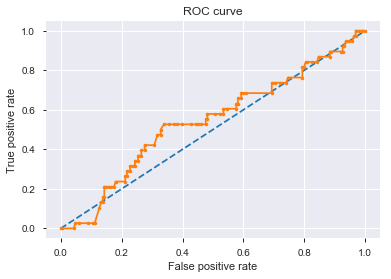

,col,auc,acc,f1macro,confusion
0,['first_review_hash_0'],0.582289,0.629956,0.508050,"([[128, 61], [23, 15]], [[0.6772486772486772, ..."
1,"['first_review_hash_0', 'first_review_hash_1']",0.571498,0.493392,0.440155,"([[91, 98], [17, 21]], [[0.48148148148148145, ..."
2,"['first_review_hash_0', 'first_review_hash_1',...",0.530006,0.466960,0.429731,"([[82, 107], [14, 24]], [[0.43386243386243384,..."
3,"['first_review_hash_0', 'first_review_hash_1',...",0.531676,0.466960,0.429731,"([[82, 107], [14, 24]], [[0.43386243386243384,..."
4,"['first_review_hash_0', 'first_review_hash_1',...",0.535297,0.449339,0.413655,"([[79, 110], [15, 23]], [[0.41798941798941797,..."
5,"['first_review_hash_0', 'first_review_hash_1',...",0.542398,0.488987,0.443345,"([[88, 101], [15, 23]], [[0.4656084656084656, ..."


In [619]:

feat_eval= util_model.sk_feature_evaluation(clf_log, dfX, 30,  
                                 colname_best=colX_best, dfy= dfy )

feat_eval


In [620]:
0

0

# Ensembling 

In [622]:
from sklearn.ensemble import VotingClassifier

clf_list = []
clf_list.append( ("clf_log", clf_log) )
clf_list.append( ("clf_lgb", clf_lgb) )
clf_list.append( ("clf_svc", clf_svc) )


clf_ens = VotingClassifier(clf_list, voting= "soft")  #Soft is required
print(clf_ens)




VotingClassifier(estimators=[('clf_log', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)), ('cl...bf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)


############# Train dataset  ####################################
Test confusion matrix
[[189   0]
 [ 33   4]]
[[1.         0.        ]
 [0.89189189 0.10810811]]
auc 0.989060489060489
gini 0.9781209781209781
acc 0.8539823008849557
f1macro 0.5574149902082962
Nsample 226
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       189
           1       1.00      0.11      0.20        37

   micro avg       0.85      0.85      0.85       226
   macro avg       0.93      0.55      0.56       226
weighted avg       0.88      0.85      0.80       226



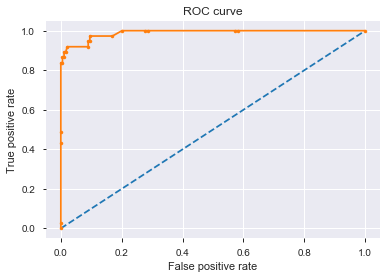

############# Test dataset  #########################################
Test confusion matrix
[[189   0]
 [ 38   0]]
[[1. 0.]
 [1. 0.]]
auc 0.606516290726817
gini 0.21303258145363402
acc 0.8325991189427313
f1macro 0.4543269230769231
Nsample 227
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       189
           1       0.00      0.00      0.00        38

   micro avg       0.83      0.83      0.83       227
   macro avg       0.42      0.50      0.45       227
weighted avg       0.69      0.83      0.76       227



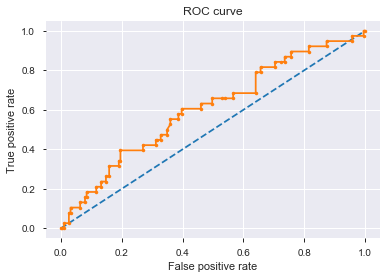

(VotingClassifier(estimators=[('clf_log', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
           solver='warn', tol=0.0001, verbose=0, warm_start=False)), ('cl...bf', max_iter=-1, probability=True, random_state=None,
   shrinking=True, tol=0.001, verbose=False))],
          flatten_transform=None, n_jobs=None, voting='soft', weights=None),
 {'ytest_pred': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1,

In [624]:
util_model.sk_model_eval_classification(clf_ens, 1,
                                           Xtrain, ytrain, Xtest, ytest)


# Saving models

In [643]:
var_colname = [   x for x in dir() if  x.startswith("col" )] 


var_df = [   x for x in dir() if  x.startswith("df" )] 

var_pipe = [   x for x in dir() if  x.startswith("pipe" )] 

var_clf = [   x for x in dir() if  x.startswith("clf" )] 


for x in [ "var_colname", "var_df", "var_pipe", "var_clf"   ] :
   print( globals()[x]  , "\n" )





['col', 'colX', 'colX_best', 'colX_kbest', 'colall', 'colcat', 'colcat_onehot', 'coldate', 'coldate_hash_model', 'coldate_list', 'colexclude', 'colid', 'colnum', 'colnum_stat', 'coltext', 'coltext_freq', 'coltext_stopwords', 'colx_best', 'coly', 'coly_stat'] 

['df', 'dfX', 'df_list', 'df_rev_sum', 'dfcat_hot', 'dfdate_dict', 'dfdate_hash', 'dfdate_list', 'dftext', 'dftext_svd_list', 'dftext_tdidf', 'dftext_tdidf_dict', 'dfy'] 

['pipe_preprocess_coldate_01', 'pipe_preprocess_coltext', 'pipe_preprocess_coltext01', 'pipe_preprocess_coltext02'] 

['clf_ens', 'clf_lgb', 'clf_lgb_stats', 'clf_list', 'clf_log', 'clf_log_feat', 'clf_log_stats', 'clf_nn', 'clf_svc', 'clf_svc_stats'] 



In [644]:



var_list


['col',
 'colX',
 'colX_best',
 'colX_kbest',
 'colall',
 'colcat',
 'colcat_onehot',
 'coldate',
 'coldate_hash_model',
 'coldate_list',
 'colexclude',
 'colid',
 'colnum',
 'colnum_stat',
 'coltext',
 'coltext_freq',
 'coltext_stopwords',
 'colx_best',
 'coly',
 'coly_stat',
 'df',
 'dfX',
 'df_list',
 'df_rev_sum',
 'dfcat_hot',
 'dfdate_dict',
 'dfdate_hash',
 'dfdate_list',
 'dftext',
 'dftext_svd_list',
 'dftext_tdidf',
 'dftext_tdidf_dict',
 'dfy',
 'pipe_preprocess_coldate_01',
 'pipe_preprocess_coltext',
 'pipe_preprocess_coltext01',
 'pipe_preprocess_coltext02',
 'clf_ens',
 'clf_lgb',
 'clf_lgb_stats',
 'clf_list',
 'clf_log',
 'clf_log_feat',
 'clf_log_stats',
 'clf_nn',
 'clf_svc',
 'clf_svc_stats']

In [675]:
folder_model = folder + "/models/model_01/" 

var_list = var_colname + var_df + var_pipe + var_clf

util.save_all(var_list , folder_model, globals_main= globals() ) 


 

D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//col.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colX.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colX_best.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colX_kbest.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colall.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colcat.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colcat_onehot.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//coldate.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//coldate_hash_model.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//coldate_list.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colexclude.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colid.pkl
D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01//colnum.pkl
D:\_devs\Python01\gitdev\da\da/da

In [280]:
util.save(clf_log , folder_model + "/clf_predict.pkl") 


'D:\\_devs\\Python01\\gitdev\\da\\da//models/model_01//clf_predict.pkl'

In [651]:
### Validate pkl data
for x in var_list :
    print(x) 
    _ = util.load(  "{a}/{b}.pkl".format(a=folder_model, b=x  ))
   
    
    
        

col
colX
colX_best
colX_kbest
colall
colcat
colcat_onehot
coldate
coldate_hash_model
coldate_list
colexclude
colid
colnum
colnum_stat
coltext
coltext_freq
coltext_stopwords
colx_best
coly
coly_stat
df
dfX
df_list
df_rev_sum
dfcat_hot
dfdate_dict
dfdate_hash
dfdate_list
dftext
dftext_svd_list
dftext_tdidf
dftext_tdidf_dict
dfy
pipe_preprocess_coldate_01
pipe_preprocess_coltext
pipe_preprocess_coltext01
error Ran out of input
pipe_preprocess_coltext02
error Ran out of input
clf_ens
clf_lgb
clf_lgb_stats
clf_list
clf_log
clf_log_feat
clf_log_stats
clf_nn
clf_svc
clf_svc_stats


# Predict values

In [659]:
#### Load data
dft = pd.read_csv(folder + 'listings_summary.zip', delimiter=',')

print(dft.shape)
dft.head(3)


(453, 96)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25


In [660]:
#### Model folder
print( folder_model )

##### Column names
coly = "price"
colid = "id"


dft = dft.set_index( colid)






D:\_devs\Python01\gitdev\da\da/data/airbnb//models/model_01/


In [ ]:
##### Pre-Process Giobally
dft = dft.replace("?",  np.nan)




In [194]:
dft.head(3)

,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,city_levenshtein_simple,city_trigram_simple,city_levenshtein_term,city_trigram_term,zip_levenshtein_simple,zip_trigram_simple,...,phone_levenshtein,phone_trigram,fax_levenshtein,fax_trigram,street_number_levenshtein,street_number_trigram,phone_equality,fax_equality,street_number_equality,is_match
id,,,,,,,,,,,,,,,,,,,,,
1204#1207,0.666667,0.666667,0.400000,0.526316,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,m,m,s,1
1272#1279,0.666667,0.666667,0.411765,0.444444,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,m,m,s,1
6258#6259,1.000000,1.000000,1.000000,1.000000,1,1,1,1,1,1,...,1.0,1.0,NaN,NaN,1.0,1.0,s,m,s,1


In [195]:
#### Pre-processing  ##############################################
dft_cat = util_feature.pd_pipeline_apply( dft[colcat].iloc[:,:], 
                                            pipe_preprocess_colcat )  



dft_cat.head(4)

############## Pipeline  0 Start (28235, 3) pd_col_fillna
phone_equality 0 replaceBY -1
fax_equality 0 replaceBY -1
street_number_equality 0 replaceBY -1
############## Pipeline   0 Finished (28235, 3)
############## Pipeline  1 Start (28235, 3) pd_col_to_onehot
phone_equality 3 (28235, 3)
fax_equality 3 (28235, 5)
street_number_equality 3 (28235, 7)
phone_equality_0 added
phone_equality_1 added
phone_equality_2 added
fax_equality_0 added
fax_equality_1 added
fax_equality_2 added
street_number_equality_0 added
street_number_equality_1 added
street_number_equality_2 added
############## Pipeline   1 Finished (28235, 9)


,phone_equality_0,phone_equality_1,phone_equality_2,fax_equality_0,fax_equality_1,fax_equality_2,street_number_equality_0,street_number_equality_1,street_number_equality_2
id,,,,,,,,,
1204#1207,0,0,0,0,0,0,0,0,0
1272#1279,0,0,0,0,0,0,0,0,0
6258#6259,0,0,0,0,0,0,0,0,0
16076#16077,0,0,0,0,0,0,0,0,0


In [196]:
#### Pre-processing   #################################################
dft_num = util_feature.pd_pipeline_apply( dft[colnum].iloc[:,:], 
                                            pipe_preprocess_colnum )  

dft_num.head(4)



############## Pipeline  0 Start (28235, 26) pd_col_to_num
############## Pipeline   0 Finished (28235, 26)
############## Pipeline  1 Start (28235, 26) pd_colnum_tocat
name_levenshtein_simple
                            name_levenshtein_simple                           
                                                min   size      mean       max
name_levenshtein_simple_bin                                                   
0                                               0.0   3244  0.133234  0.199916
1                                               0.2   4352  0.284679  0.399802
2                                               0.4   4713  0.495519  0.599206
3                                               0.6   4992  0.679888  0.797778
4                                               0.8  10934  0.945298  1.000000
name_trigram_simple
                        name_trigram_simple                           
                                        min   size      mean       max
name_trigram_

,name_levenshtein_simple_bin_0,name_levenshtein_simple_bin_1,name_levenshtein_simple_bin_2,name_levenshtein_simple_bin_3,name_levenshtein_simple_bin_4,name_trigram_simple_bin_0,name_trigram_simple_bin_1,name_trigram_simple_bin_2,name_trigram_simple_bin_3,name_trigram_simple_bin_4,...,street_number_levenshtein_bin_0,street_number_levenshtein_bin_1,street_number_levenshtein_bin_2,street_number_levenshtein_bin_3,street_number_levenshtein_bin_4,street_number_trigram_bin_-1,street_number_trigram_bin_0,street_number_trigram_bin_1,street_number_trigram_bin_2,street_number_trigram_bin_4
id,,,,,,,,,,,,,,,,,,,,,
1204#1207,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1272#1279,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
6258#6259,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
16076#16077,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [667]:
#### Pre-processing   #################################################
coldate = util.load( folder_model + "/coldate.pkl") 
print(coldate)
dft_date = util_feature.pd_pipeline_apply( dft[ coldate ].iloc[:,:], 
                                           pipe_preprocess_coldate_01 )  

dft_date.head(4)


['first_review', 'host_since']
############## Pipeline  0 Start (453, 2) pd_coltext_fillna
############## Pipeline   0 Finished (453, 2)
############## Pipeline  1 Start (453, 2) pd_coltext_minhash
############## Pipeline   1 Finished (453, 6)


,first_review_hash_0,first_review_hash_1,first_review_hash_2,first_review_hash_3,host_since_hash_0,host_since_hash_1
0,0.015973,0.054575,0.053763,0.000065,0.085544,0.012219
1,0.072877,0.108171,0.026549,0.021042,0.092159,0.111353
2,0.092159,0.020624,0.014038,0.039355,0.085544,0.028555
3,0.005336,0.012219,0.006054,0.026590,0.014960,0.014379


In [662]:
#### Pre-processing   #################################################
coltext = util.load( folder_model + "/coltext.pkl") 
print(coltext)
dft_text = util_feature.pd_pipeline_apply( dft[coltext].iloc[:,:], 
                                           pipe_preprocess_coltext01 )  

dft_text.head(4)


['house_rules', 'neighborhood_overview', 'notes', 'street']
############## Pipeline  0 Start (453, 4) pd_coltext_clean
############## Pipeline   0 Finished (453, 1)
############## Pipeline  1 Start (453, 1) pd_coltext_tdidf
############## Pipeline   1 Finished (453, 95)
############## Pipeline  2 Start (453, 95) pd_dim_reduction
############## Pipeline   2 Finished (453, 2)


,house_rules_svd_0,house_rules_svd_1
0,0.282025,-0.036450
1,0.000000,0.000000
2,0.453837,-0.059220
3,0.340081,-0.056896


In [668]:
#### Merge data , Create data
df_final = pd.concat(( #dft_cat, 
                       #dft_num,
                       dft_date,
                       dft_text
                     
                     ), axis=1)

col_final = list( df_final.columns )
df_final.head(5)


colX  = util.load(folder_model + "colX.pkl")
df_final[colX].head(3)




,first_review_hash_0,first_review_hash_1,first_review_hash_2,first_review_hash_3,host_since_hash_0,host_since_hash_1,house_rules_svd_0,house_rules_svd_1
0,0.015973,0.054575,0.053763,0.000065,0.085544,0.012219,0.282025,-0.03645
1,0.072877,0.108171,0.026549,0.021042,0.092159,0.111353,0.000000,0.00000
2,0.092159,0.020624,0.014038,0.039355,0.085544,0.028555,0.453837,-0.05922


In [688]:
#### Model Load
clf_prod = util.load(folder_model + "clf_log.pkl")

print(clf_prod)

dfX =  util.load(folder_model + "dfX.pkl")
dfy =  util.load(folder_model + "dfy.pkl")

dfX["ytest_"] =   clf_prod.predict( dfX.iloc[:,:])


print( dfX["ytest_"], dfy )
print(dfy)



LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
423    1
424    1
425    1
426    1
427   -1
428   -1
429    1
430    1
431    1
432   -1
433    1
434    1
435    1
436    1
437   -1
438    1
439    1
440    1
441   -1
442    1
443   -1
444    1
445   -1
446    1
447   -1
448    1
449   -1
450    1
451    1
452    1
Name: ytest_, Length: 453, dtype: int64 id
2015     -1
2695     -1
3176     -1
3309     -1
7071     -1
9991      1
14325    -1
16401     1
16644    -1
17409    -1
17904    -1
20858 

In [689]:
#### Predict  
dft[coly] = clf_prod.predict( df_final[colX].iloc[:,:])
print(coly)







price


In [694]:
dft.sample(frac=0.2).head(5)

SyntaxError: invalid syntax (<ipython-input-694-2df333f68707>, line 1)

In [695]:
dft[coly].sample(frac=0.2).head(10) 

id
192050    1
183206    1
38296     1
46161     1
450325   -1
266181    1
188565   -1
346404    1
242794    1
370561   -1
Name: price, dtype: int64

In [696]:
###### Export 
dft = dft.reset_index()
dft[[ colid, coly  ]].to_csv( folder_out + "adress_pred.csv" , index=False, mode="w")




NameError: name 'folder_out' is not defined

69